In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

In [ ]:
train_path='input/train' 
test_path='input/test'
val_path='input/val' 

In [ ]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

# PLOT DATA

## Function Plot Image

In [ ]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

## Normal Label 

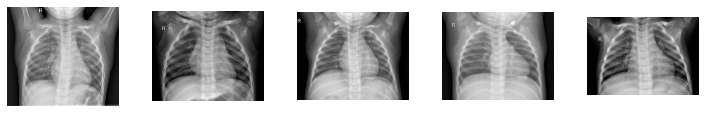

In [ ]:
plot_images(train_path+'/NORMAL')

## Pneumonia Lable

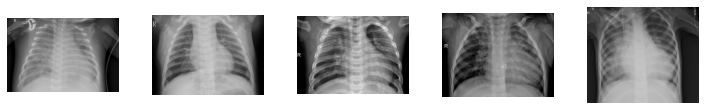

In [ ]:
plot_images(train_path+'/PNEUMONIA')

## PLot Bar chart Diagram "Counter Label Data"

In [ ]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

### Data Training Diagram

{'NORMAL': 1341, 'PNEUMONIA': 3875}


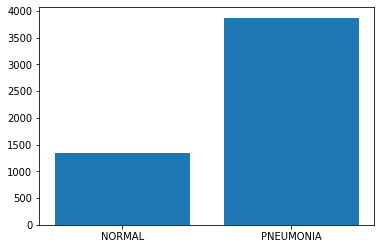

In [ ]:
plot_bar_chart_diagram(train_path)

### Data Testing Diagram 

{'NORMAL': 234, 'PNEUMONIA': 390}


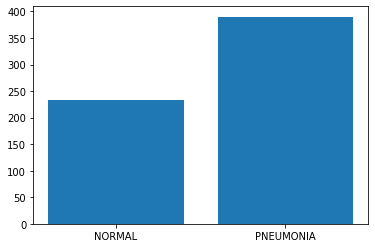

In [ ]:
plot_bar_chart_diagram(test_path)

# Data Generator

In [ ]:
batch_size = 32
target_size = (116,82)

train_datagen = ImageDataGenerator(rescale=1./255.0,
                                   validation_split=0.3,
                                   zoom_range=0.8,
                                  horizontal_flip=True,
                
                                  )
test_datagen=ImageDataGenerator(rescale = 1./255.0)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        subset="training",
        class_mode='binary')

val_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        subset="validation",
        class_mode='binary')
test_generator=test_datagen.flow_from_directory(
        test_path,
        target_size=target_size,
        class_mode='binary',
        batch_size=batch_size,
        shuffle=False)

Found 3652 images belonging to 2 classes.
Found 1564 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Training Model By CNN

## Build Model CNN

In [ ]:
input_shape = (116,82,3) # img_rows, img_colums, color_channels

In [ ]:
# Build Model
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 114, 80, 64)       1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 114, 80, 64)       36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 57, 40, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 57, 40, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 40, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 40, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 20, 128)       0


<p style="background-color:#252629;font-family:avenir next;color:#F1F3F4;font-size:200%;text-align:center;border-radius:25px 25px;">Plot Model</p>

In [ ]:
# Compile Model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Compile Model

In [ ]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001), metrics=['accuracy'],) 

## Training Model 

In [ ]:
earlystop =tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=15, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.5, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)
# checkpoint=tf.keras.callbacks.ModelCheckpoint(
#      checkpoint_path, verbose=1, save_weights_only=True,
#     period=5
# )
weight_for_0 = (1.0 / 1341)*(5216/2.0)
weight_for_1 = (1.0 / 3875)*(5216/2.0)
print(weight_for_0,weight_for_1)
class_weight = {0: weight_for_0, 1: weight_for_1}
callback=[earlystop,reduce_lr]
history = model.fit(train_generator, epochs=35 ,verbose=1, validation_data=val_generator,callbacks=callback,class_weight=class_weight,)

1.9448173005219984 0.6730322580645162
Epoch 1/35
115/115 [==============================] - 317s 3s/step - loss: 0.6935 - accuracy: 0.4841 - val_loss: 0.6901 - val_accuracy: 0.7065
Epoch 2/35
115/115 [==============================] - 303s 3s/step - loss: 0.6930 - accuracy: 0.5923 - val_loss: 0.6744 - val_accuracy: 0.6381
Epoch 3/35
115/115 [==============================] - 294s 3s/step - loss: 0.6715 - accuracy: 0.5643 - val_loss: 0.6667 - val_accuracy: 0.6701
Epoch 4/35
115/115 [==============================] - 299s 3s/step - loss: 0.5717 - accuracy: 0.7078 - val_loss: 0.5959 - val_accuracy: 0.6483
Epoch 5/35
115/115 [==============================] - 302s 3s/step - loss: 0.5239 - accuracy: 0.7382 - val_loss: 0.5259 - val_accuracy: 0.7526
Epoch 6/35
115/115 [==============================] - 324s 3s/step - loss: 0.4648 - accuracy: 0.7845 - val_loss: 0.4728 - val_accuracy: 0.7615
Epoch 7/35
115/115 [==============================] - 305s 3s/step - loss: 0.4228 - accuracy: 0.8163 - v

In [ ]:
models.save_model(model ,'./Diagnose_Pneumoinia.h5') 

## Evaluate Model 

In [ ]:
score = model.evaluate(val_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

49/49 [==============================] - 36s 724ms/step - loss: 0.2692 - accuracy: 0.8894
Test loss:  0.2691881060600281
Test accuracy:  0.8893861770629883


In [ ]:
score = model.evaluate(train_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

115/115 [==============================] - 88s 764ms/step - loss: 0.2067 - accuracy: 0.9203
Test loss:  0.2066669762134552
Test accuracy:  0.9203176498413086


In [ ]:
score = model.evaluate(test_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

20/20 [==============================] - 13s 625ms/step - loss: 0.2991 - accuracy: 0.8990
Test loss:  0.2990931570529938
Test accuracy:  0.8990384340286255


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


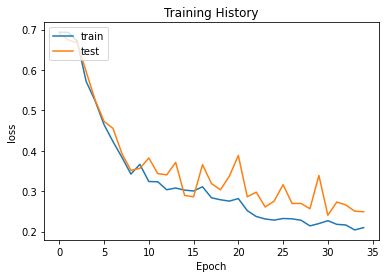

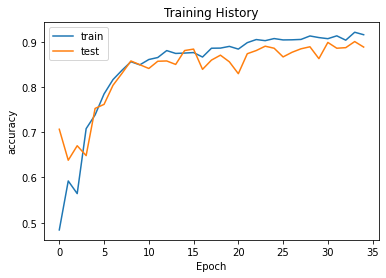

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

              precision    recall  f1-score   support

      NORMAL       0.88      0.85      0.86       234
   PNEUMONIA       0.91      0.93      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624



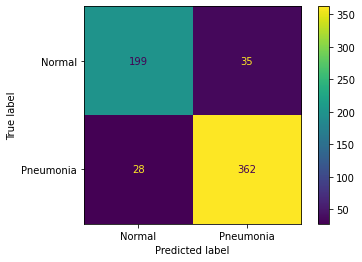

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
y_pred = np.round(model.predict(test_generator))
y_true = test_generator.classes
y_labels = list(test_generator.class_indices.keys())
display(ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['Normal', 'Pneumonia']).plot())
print(classification_report(y_true, y_pred, target_names=y_labels))